# AI 모델 1
### 이번 장은 가공된 데이터를 fbprophet을 통해 예측해보는 과정입니다.
### fbprophet을 사용한 AI 예측에 대한 학습을 건너뛰실 분은 이번 장을 건너뛰셔도 좋습니다.

## 목차
1. fbprophet 불러오기
1. fbprophet 소개
1. fbprophet 모델 선정
1. 학습
1. 결과 평가

## 1. fbprophet 불러오기

### Step 1. fbprophet 설치

fbprophet을 pip을 통해 설치할 것입니다.  
pip은 파이썬의 여러 패키지를 관리해주는 도구입니다.  
본래는 터미널을 통해 불러와야하지만 '!'을 통해 jupyter에서도 호출할 수 있습니다.  
아래를 통해 fbprophet을 설치합니다.  
설치를 위해선 충분한 메모리와 CPU가 뒷받침 돼야 합니다.

In [1]:
!pip install convertdate # fbprophet 설치시 에러 방지 위해 추가
!pip install fbprophet

Looking in indexes: http://10.220.235.19/pypi/simple
     |████████████████████████████████| 64 kB 42.2 MB/s eta 0:00:01
     |████████████████████████████████| 67.3 MB 103.4 MB/s eta 0:00:01B 103.4 MB/s eta 0:00:01                | 14.4 MB 103.4 MB/s eta 0:00:01MB/s eta 0:00:01�█████████▋                 | 30.8 MB 103.4 MB/s eta 0:00:01��▊               | 35.2 MB 103.4 MB/s eta 0:00:01| 38.9 MB 103.4 MB/s eta 0:00:01�█████▏           | 42.3 MB 103.4 MB/s eta 0:00:01ta 0:00:01�███████████        | 50.3 MB 103.4 MB/s eta 0:00:01| 53.2 MB 103.4 MB/s eta 0:00:01�████████████▏    | 57.1 MB 103.4 MB/s eta 0:00:01ta 0:00:01�█▍ | 63.8 MB 103.4 MB/s eta 0:00:01
     |████████████████████████████████| 47 kB 64.3 MB/s eta 0:00:01
     |████████████████████████████████| 133 kB 109.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 81.8 MB/s eta 0:00:0101
     |████████████████████████████████| 5.4 MB 75.3 MB/s eta 0:00:01�███████████████          | 3.7 MB 75.3 MB/s eta 0:00:01
  ER

설치 과정에서 필요한 패키지를 다운로드하기 전, 한 번 오류가 발생할 수 있습니다.  
정상적으로 설치가 완료되었다면 아래를 실행할 수 있습니다.

In [2]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


이제 우리가 사용해왔던 라이브러리와 데이터를 불러옵니다.

#### (실습 1) aicentro.session.Session, aicentro.framework.keras.Keras, numpy, pandas 라이브러리를 import하고 "data_2.csv"를 불러옵시다.

In [3]:
# Hint : 이번엔 header=None을 제외하고 불러옵니다.
from aicentro.session import Session
from aicentro.framework.keras import Keras as AiduFrm
import numpy as np
import pandas as pd
aidu_session = Session(verify=False)
aidu_framework = AiduFrm(session=aidu_session)
data = pd.read_csv("data_2.csv")

## 2. fbprophet 소개

### Step 1 fbprophet과 시계열 데이터

fbprophet은 fb에서 알 수 있듯이 페이스북에서 공개한 시계열 데이터를 분석하는 라이브러리입니다.  
시계열 데이터는 우리가 가지 데이터와 같이 시간의 흐름에 따라 변화한 데이터를 뜻합니다.  
그렇지 않은 데이터로는 그림이나 연령층, 성별에 따른 무언가의 선호도 데이터 등이 있습니다.  
하지만 시계열 데이터로는 우리가 가진 날짜에 따른 기온 변화, 시간에 따른 수온 변화와 같은 데이터를 뜻합니다.

### Step 2 fbprophet의 특징  
시계열 데이터에 대해 prophet이 중요하게 다루는 요소가 3가지 있습니다.  
주기성, 트렌드, 휴일 등과 같은 이벤트입니다.  
세 가지 요소에 대해 알아보세요.

#### (실습 2) fbprophet에선 y=g(t) + s(t) + h(t) + e(t) 의 공식을 사용합니다. 여기서 y는 예측값, t는 시간입니다. g, s, h, e의 의미에 대해 알아보세요.

In [ ]:
# Hint : 인터넷을 통해 쉽게 찾아볼 수 있습니다.
# g : 트렌드의 변화를 예측합니다. 시간이 흐르더라도 점차 커지거나 작아지는 등의 변화입니다. 예를 들어 매년 증가하는 해양 수온과 같은 데이터의 방향성을 예측합니다.
# s : 주기성을 에측합니다. 주 단위, 연 단위 등으로 시간이 흐르면서 일정하게 반복되는 패턴을 학습합니다.
# h : 휴일과 같은 특별한 이벤트에 대해 예측합니다. 어떤 데이터는 특정 요일엥 급변하는 경우가 있습니다. 이들 데이터가 다른 데이터들에 대한 학습을 방해하지 않도록 구분합니다.
# e : 데이터가 예측 범위 내에서 정규분포로 움직일 것이라 예상한 오차입니다.

## 3. 모델 선정

### Step 1 데이터 정리

우선 우리가 가져온 데이터를 살펴봅시다.  

In [4]:
data

,date,dev,val
0,20190101,2,29.0
1,20190102,2,32.0
2,20190103,2,29.0
3,20190104,2,23.0
4,20190105,2,46.0
...,...,...,...
325,20191126,2,13.0
326,20191127,2,9.0
327,20191128,2,12.0
328,20191129,2,11.0


이 중 dev열은 장비 2번을 사용했다는 의미를 갖고 있지만, 이번 학습 중에는 모든 데이터가 동일한 장비에서 가져온 데이터이므로 의미가 없을 것입니다.  
해당 열을 제외하도록 합시다.

#### (실습 3) dev열을 data에서 제외해봅시다.

In [5]:
# Hint : 이전엔 열 이름이 1, 2, 3과 같은 숫자였지만 이번엔 dev입니다.
data_dropped = data.drop('dev', axis='columns')
data_dropped

,date,val
0,20190101,29.0
1,20190102,32.0
2,20190103,29.0
3,20190104,23.0
4,20190105,46.0
...,...,...
325,20191126,13.0
326,20191127,9.0
327,20191128,12.0
328,20191129,11.0


이제 date열을 살펴봅시다.  
date열은 이름은 date이지만 실제론 어떨까요?  
info()를 통해 확인해보면 실제론 정수로 취급되고 있음을 알 수 있습니다.  
이제 이 값을 python에서 사용하는 datetime의 "연월일" 형식으로 바꿔봅시다.  
그리고 set_index()함수를 통해 date열을 DataFrame의 index로 설정할 수 있습니다.

In [6]:
import datetime

data_dropped['date'] = pd.to_datetime(data_dropped['date'],format='%Y%m%d')
data_dropped = data_dropped.set_index('date')
data_dropped

,val
date,
2019-01-01,29.0
2019-01-02,32.0
2019-01-03,29.0
2019-01-04,23.0
2019-01-05,46.0
...,...
2019-11-26,13.0
2019-11-27,9.0
2019-11-28,12.0


### Step 2 데이터 분리

이제 데이터를 학습을 위한 데이터, 예측 후 비교를 위한 데이터로 나눠봅시다.  
우리는 1월부터 10월까지의 데이터로 학습을, 11월의 데이터를 평가를 위한 데이터로 사용할 것입니다.  
DataFrame의 loc[]와 datetime.datetime()을 사용해 2019년 11월 1일 전후로 데이터를 나눠봅니다.

#### (실습 4) 앞서 정리한 데이터를 2019.01.01 ~ 2019.10.31과 2019.11.01 ~ 2019.11.30의 두 데이터로 분리합니다.

In [7]:
# Hint : Python의 배열에서 ':'를 다루는 방법을 사용합니다.
train = data_dropped.loc[:datetime.datetime(2019,10,31),:]
test = data_dropped.loc[datetime.datetime(2019,11,1):,:]
train

,val
date,
2019-01-01,29.0
2019-01-02,32.0
2019-01-03,29.0
2019-01-04,23.0
2019-01-05,46.0
...,...
2019-10-27,10.0
2019-10-28,8.0
2019-10-29,21.0


### Step 3. 모델 생성

이제 학습을 위한 모델을 생성하겠습니다.  
우리 데이터가 앞서 다뤘던 Prophet의 특징 중 어떤 것을 사용할 수 있을까요?  
우선 데이터는 한 해 동안의 데이터로 특별한 경향성을 보이지 않는다고 생각할 수 있습니다.  
계절에 따른 변화는 있을 수 있겠지만 자칫 잘못하면 봄에 집중된 초미세먼지 이후 감소하는 경향을 토대로 꾸준히 감소하는 초미세먼지 농도를 예측하게 될 수 있습니다.  
그렇다면 계절성은 어떨까요?  
봄에 집중되는 황사를 고려하면 초미세먼지는 계절성, 연 주기성을 가질지 모릅니다. 이 성질은 있을 것으로 가정해보죠.  
마지막으로 휴일과 같은 이벤트가 있을지 고려합니다.  
연중 특별한 때에 집중될 순 있지만 이것이 주기성을 갖고 찾아오거나 우리가 예측할 수 있는 형태는 아닐 것으로 보입니다.  
따라서 이것도 없는 것으로 생각하고 가장 간단한 모델을 만들어보죠.  
원하면 더 복잡한 모델을 생성해봐도 좋습니다.

#### (실습 5) Prophet에 데이터를 제공하기 위해 적절한 형태로 DataFrame을 변형해봅시다. 기본적으로 날짜는 ds열, 값은 y열입니다.

In [8]:
# Hint : loc과 reset_index()를 사용해봅니다.
train = train.reset_index().rename(columns={'val':'y'})
train['ds'] = pd.to_datetime(train['date'].astype(str))
train = train.drop('date',axis=1)
test = test.reset_index().rename(columns={'val':'y'})
test['ds'] = pd.to_datetime(test['date'].astype(str))
test = test.drop('date',axis=1)

이제 모델을 생성하고 학습을 진행시켜 보죠.

## 4. 학습

### Step 1. 모델을 통한 학습

#### (실습 6) 모델을 생성하고 학습합니다.

In [9]:
# Hint : 가장 간단한 모델의 형태는 Prophet(yearly_seasonality=True)일 것입니다.
model = Prophet(yearly_seasonality=True)
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


이제 모델을 통해 예측해봅시다.  
예측엔 predict()를 사용합니다.

#### (실습 7) 모델을 통해 test 기간에 맞게 예측해봅니다.

In [10]:
# Hint : 예측한 데이터를 새로운 변수에 저장합니다.
forecast = model.predict(test)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-11-01,9.435925,-3.295730,35.695264,9.435925,9.435925,6.746387,6.746387,6.746387,1.922298,1.922298,1.922298,4.824089,4.824089,4.824089,0.0,0.0,0.0,16.182311
1,2019-11-02,9.372284,-4.875317,34.585997,9.372284,9.372284,5.367404,5.367404,5.367404,0.752715,0.752715,0.752715,4.614689,4.614689,4.614689,0.0,0.0,0.0,14.739688
2,2019-11-03,9.308643,-6.122668,31.425542,9.308643,9.308643,2.187408,2.187408,2.187408,-2.124499,-2.124499,-2.124499,4.311907,4.311907,4.311907,0.0,0.0,0.0,11.496051
3,2019-11-04,9.245002,-8.203681,31.057745,9.245002,9.245002,2.908274,2.908274,2.908274,-1.011054,-1.011054,-1.011054,3.919328,3.919328,3.919328,0.0,0.0,0.0,12.153276
4,2019-11-05,9.181361,-3.124143,35.489269,9.181361,9.181361,7.964520,7.964520,7.964520,4.521656,4.521656,4.521656,3.442864,3.442864,3.442864,0.0,0.0,0.0,17.145881
5,2019-11-06,9.117721,-11.057983,29.087434,9.117721,9.117721,0.130206,0.130206,0.130206,-2.760475,-2.760475,-2.760475,2.890681,2.890681,2.890681,0.0,0.0,0.0,9.247926
6,2019-11-07,9.054080,-8.936866,30.183558,9.054080,9.054080,0.972425,0.972425,0.972425,-1.300640,-1.300640,-1.300640,2.273065,2.273065,2.273065,0.0,0.0,0.0,10.026505
7,2019-11-08,8.990439,-6.049132,31.524494,8.990439,8.990439,3.524514,3.524514,3.524514,1.922298,1.922298,1.922298,1.602216,1.602216,1.602216,0.0,0.0,0.0,12.514953
8,2019-11-09,8.926798,-8.531336,29.221729,8.926798,8.926798,1.644712,1.644712,1.644712,0.752715,0.752715,0.752715,0.891998,0.891998,0.891998,0.0,0.0,0.0,10.571511
9,2019-11-10,8.863157,-13.159088,25.322289,8.863157,8.863157,-1.966875,-1.966875,-1.966875,-2.124499,-2.124499,-2.124499,0.157624,0.157624,0.157624,0.0,0.0,0.0,6.896282


## 5. 결과 평가

### Step 1. DataFrame을 통한 데이터 비교

이제 데이터가 잘 예측되었는지 확인해봅시다.  
DataFrame으로 예측된 데이터를 확인할 수 있습니다.  
각 열의 의미를 파악하며 데이터가 얼마나 정확하게 예측했는지 봅시다.

### Step 2. 그래프

데이터를 비교하는 다른 방법은 그래프로 이를 그려보는 것입니다.  
우리는 matplotlib을 통해 이 과정을 수행할 수 있습니다.  

#### (실습 8) Matplotlib 혹은 Seaborn 등의 그래프 라이브러리를 import해 그래프를 그려봅니다.

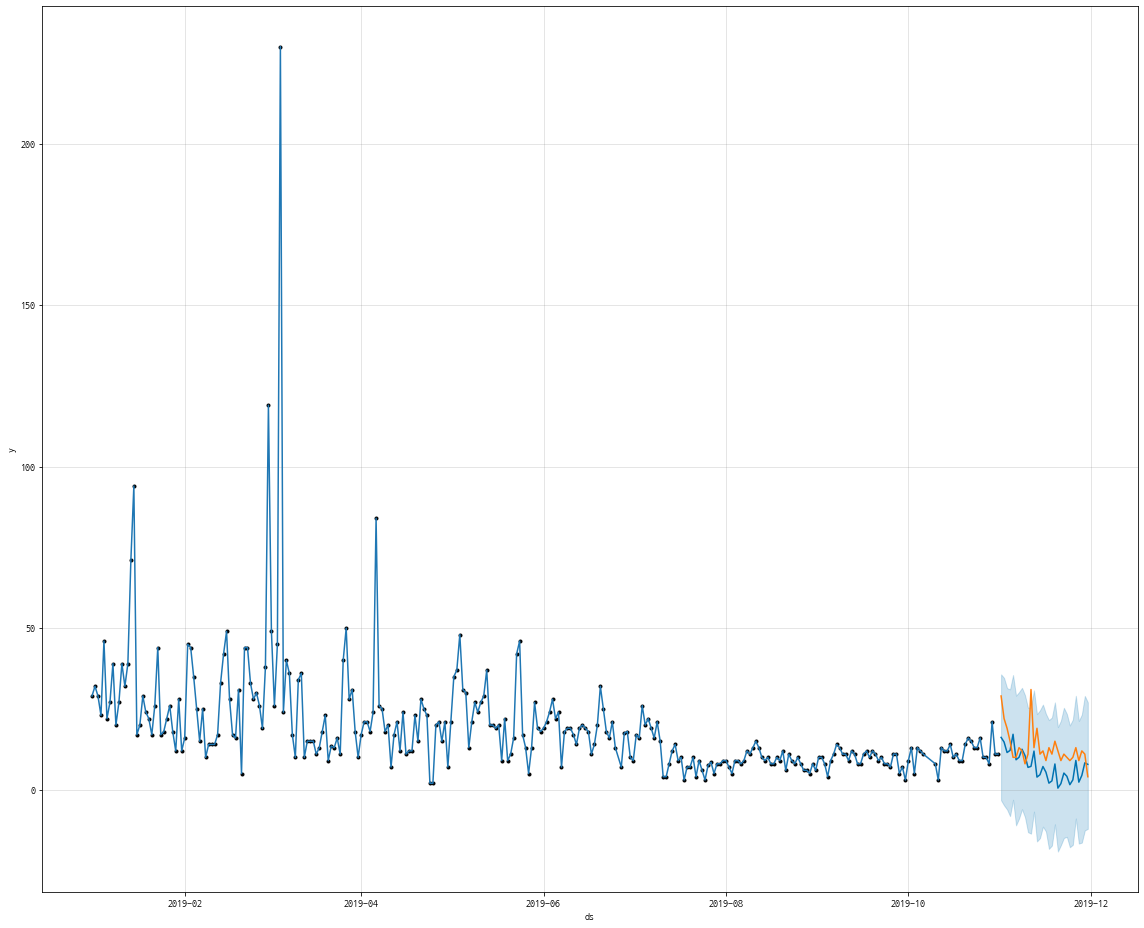

In [11]:
# Hint : %matplotlib inline을 통해 화면에 바로 그래프를 표출할 수 있습니다.
# Hint : Prophet에서plot()을 사용하면 그래프를 바로 그릴 수도 있습니다.
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax=plt.subplots(figsize=(16,13))
model.plot(forecast, ax=ax)
plt.plot(train['ds'],train['y'])
plt.plot(test['ds'],test['y'])

### Step 3. 결과 분석
학습을 시키는 것만큼이나 결과를 분석하는 것도 중요합니다.  
저의 경우는 대체로 학습이 잘 이루어지지 않았군요.  
아마 연주기성을 주었음에도 1년에 해당하는 데이터를 입력하지 않았던 점, 다시 말해 데이터가 불충분했기 때문으로 보입니다.  
그 외에도 모델의 적합성, 학습 방법에 따른 차이 등을 들 수 있을 겁니다.  
#### (실습 9) 학습을 향상시키려면 어떤 방법이 있을지 생각해봅니다.

1. 충분한 데이터의 확보
2. 데이터의 특성 이해(주기성)
3. 중간값이 아닌 값으로 선택